In [2]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/anaconda/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [4]:
xtrain.shape

(60000, 28, 28)

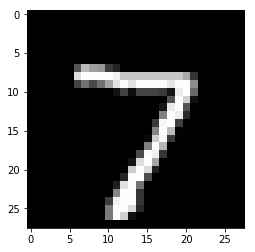

In [5]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [6]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [7]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [34]:
#Represent Training & Testing samples suitable for 
#tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],28,28,1).astype('float32')
x_test=xtest.reshape(xtest.shape[0],28,28,1).astype('float32')
#for theano (1,28,28), for tensorflow (28,28,1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [35]:
x_train/=255
y_train/=255

In [10]:
#Encoding the output class label (One-Hot Encoding)
y_train=np_utils.to_categorical(ytrain,10)
y_test=np_utils.to_categorical(ytest,10)
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
model=Sequential()
model.add(Conv2D(32,(3,3),border_mode='valid',input_shape=(28,28,1),activation='relu'))


/usr/local/anaconda/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu", padding="valid")`
  


In [28]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(128,activation='relu'))

In [31]:
model.add(Dense(10,activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.fit(x_train,y_train,batch_size=200,nb_epoch=12,verbose=1,validation_data=(x_test,y_test))

/usr/local/anaconda/python3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 156us/step - loss: 8.6763 - acc: 0.4584 - val_loss: 8.3143 - val_acc: 0.4822
Epoch 2/12
60000/60000 [==============================] - 9s 151us/step - loss: 8.2351 - acc: 0.4874 - val_loss: 8.1759 - val_acc: 0.4910
Epoch 3/12
60000/60000 [==============================] - 9s 152us/step - loss: 4.9425 - acc: 0.6796 - val_loss: 0.1698 - val_acc: 0.9647
Epoch 4/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0983 - acc: 0.9741 - val_loss: 0.0763 - val_acc: 0.9779
Epoch 5/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0392 - acc: 0.9890 - val_loss: 0.0681 - val_acc: 0.9823
Epoch 6/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0191 - acc: 0.9949 - val_loss: 0.0775 - val_acc: 0.9810
Epoch 7/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0095 - acc: 0.9976 - val_loss: 0.0747 - 

In [21]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 114us/step


In [37]:
score

[0.04838745003801814, 0.9879]

In [38]:
y_predict = model.predict(x_test)

In [39]:
np.argmax(y_predict[0])

7

In [40]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 976    0    1    0    0    0    2    0    1    0]
 [   1 1126    2    1    1    1    3    0    0    0]
 [   2    3 1010    2    1    0    1    7    4    2]
 [   0    0    1  996    0    7    0    1    3    2]
 [   0    1    0    0  970    0    1    1    2    7]
 [   2    0    0    6    0  881    1    0    1    1]
 [   5    2    0    0    1    5  943    0    2    0]
 [   0    3    6    2    1    0    0 1011    3    2]
 [   3    0    3    5    5    2    0    2  949    5]
 [   2    3    0    3    6    4    0    0    4  987]]


In [41]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.99      0.98      0.98      1032
          3       0.98      0.99      0.98      1010
          4       0.98      0.99      0.99       982
          5       0.98      0.99      0.98       892
          6       0.99      0.98      0.99       958
          7       0.99      0.98      0.99      1028
          8       0.98      0.97      0.98       974
          9       0.98      0.98      0.98      1009

avg / total       0.98      0.98      0.98     10000

